In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
products.head(2)

,Unnamed: 0,product_id,products_category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_size_l*b*h_cm3
0,0,1e9e8ef04dbcff4541ed26657ea517e5,Fashion,40.0,287.0,1.0,225.0,2240.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,others,44.0,276.0,1.0,1000.0,10800.0


In [66]:
orderitems.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [67]:
orderitems.order_item_id.value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
20        3
16        3
17        3
18        3
19        3
21        1
Name: order_item_id, dtype: int64

In [68]:
orderpayments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [2]:
customers=pd.read_csv("olist_customers_dataset.csv")
geolocations=pd.read_csv("olist_geolocation_dataset.csv")
orderitems=pd.read_csv("olist_order_items_dataset.csv")
orderpayments=pd.read_csv("olist_order_payments_dataset.csv")
orderreviews=pd.read_csv("olist_order_reviews_dataset.csv")
orders=pd.read_csv("olist_orders_dataset.csv")
products=pd.read_csv("products.csv")
sellers=pd.read_csv("olist_sellers_dataset.csv")
translations=pd.read_csv("product_category_name_translation.csv")

# PROBLEM STATEMENT

### To find out which products can be placed together.  This would give retailer good information about related sales on group of goods basis. (Market basket analysis)

### To predict customer scores based on customer segmentation (Recency, frequency, monetary value analysis) for the company.

# Merging the datasets


In [3]:
df=pd.merge((pd.merge((pd.merge((pd.merge((pd.merge(products,orderitems,on='product_id',how='inner')),orders,on='order_id',how='inner')),orderpayments,on='order_id',how='inner')),orderreviews,on='order_id',how='inner')),customers,on='customer_id',how='inner')

# Dropping useless columns

In [4]:
df.drop(["Unnamed: 0","review_creation_date","review_answer_timestamp","shipping_limit_date","order_approved_at","order_delivered_carrier_date","customer_zip_code_prefix","customer_unique_id","payment_installments","review_id","review_comment_title","review_comment_message","review_creation_date","review_answer_timestamp"],axis=1,inplace=True)

In [5]:
#changing datetime to date
from datetime import datetime
df["order_purchase_timestamp"]=pd.to_datetime(df.order_purchase_timestamp).dt.date #Timestamp of the purchase.
df["order_delivered_customer_date"]=pd.to_datetime(df.order_delivered_customer_date).dt.date #date at which customer got the product.
df["order_estimated_delivery_date"]=pd.to_datetime(df.order_estimated_delivery_date).dt.date #estimated delivery date of the products

In [6]:
from datetime import date
df["no_of_days_taken"]=df.order_delivered_customer_date-df.order_purchase_timestamp

In [7]:
df.drop(["order_purchase_timestamp","order_delivered_customer_date","order_estimated_delivery_date"],axis=1,inplace=True)

# Missing Values 

In [8]:
df.isnull().sum()

product_id                       0
products_category                0
product_name_length              0
product_description_length    1709
product_photos_qty               0
product_weight_g                 0
product_size_l*b*h_cm3           0
order_id                         0
order_item_id                    0
seller_id                        0
price                            0
freight_value                    0
customer_id                      0
order_status                     0
payment_sequential               0
payment_type                     0
payment_value                    0
review_score                     0
customer_city                    0
customer_state                   0
no_of_days_taken              2588
dtype: int64

In [9]:
rno=df[df.no_of_days_taken.isnull()].index
for i in rno:
    df.loc[i,'no_of_days_taken']=df.no_of_days_taken.median()

In [10]:
df.isnull().sum()
#No null values now.

product_id                       0
products_category                0
product_name_length              0
product_description_length    1709
product_photos_qty               0
product_weight_g                 0
product_size_l*b*h_cm3           0
order_id                         0
order_item_id                    0
seller_id                        0
price                            0
freight_value                    0
customer_id                      0
order_status                     0
payment_sequential               0
payment_type                     0
payment_value                    0
review_score                     0
customer_city                    0
customer_state                   0
no_of_days_taken                 0
dtype: int64

# Univariate Analysis

In [11]:
df.columns

Index(['product_id', 'products_category', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_size_l*b*h_cm3', 'order_id', 'order_item_id', 'seller_id',
       'price', 'freight_value', 'customer_id', 'order_status',
       'payment_sequential', 'payment_type', 'payment_value', 'review_score',
       'customer_city', 'customer_state', 'no_of_days_taken'],
      dtype='object')

/Users/shivam/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


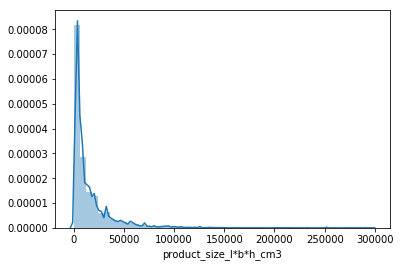

In [12]:
sns.distplot(df['product_size_l*b*h_cm3'])
plt.show()

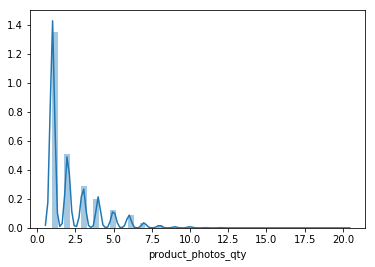

In [13]:
sns.distplot(df['product_photos_qty'])
plt.show()

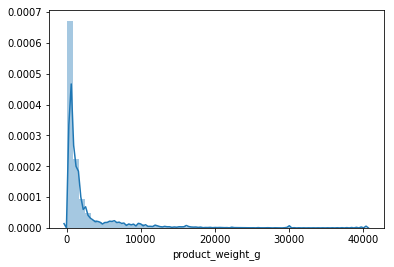

In [14]:
sns.distplot(df['product_weight_g'])
plt.show()

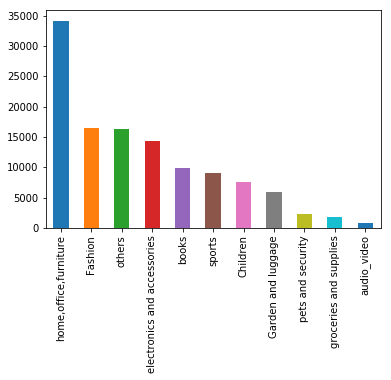

In [15]:
df['products_category'].value_counts().plot(kind='bar')
plt.show()

In [16]:
#order_item_id is a unique id given to each item ordered in the order.
#So it is not required as we have order_id.
#so dropping it.
df=df.drop(["order_item_id"],axis=1)

In [17]:
len(df.seller_id.unique())

3095

In [18]:
print(df.price.mean())
print(df.price.std())

120.65102700430573
184.1096262765044


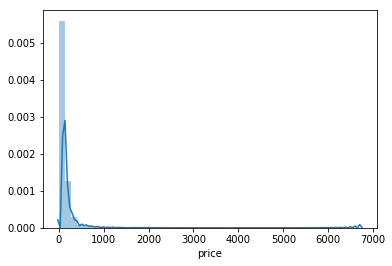

In [19]:
sns.distplot(df.price)
plt.show()

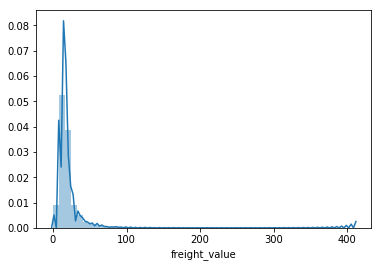

In [20]:
sns.distplot(df.freight_value)
plt.show()

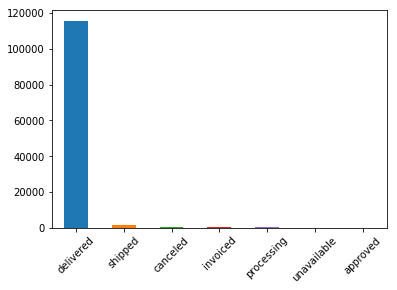

In [21]:
df.order_status.value_counts().plot(kind="bar")
plt.xticks(rotation=45)
plt.show()

In [22]:
df.order_status.value_counts()/len(df.order_status)*100

delivered      97.813464
shipped         1.060728
canceled        0.481765
invoiced        0.317796
processing      0.317796
unavailable     0.005916
approved        0.002536
Name: order_status, dtype: float64

In [23]:
print(df.payment_value.mean())
print(df.payment_value.std())

172.57565101635439
267.10466094508513


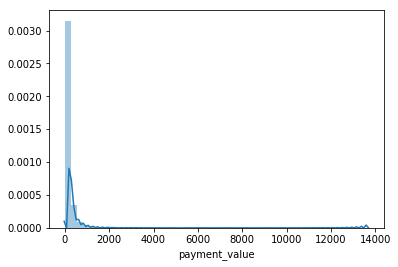

In [24]:
sns.distplot(df.payment_value)
plt.show()

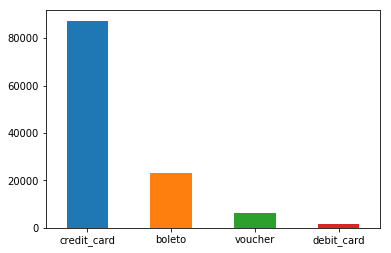

In [25]:
df.payment_type.value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

In [26]:
df.payment_type.value_counts()/len(df.payment_type)*100

credit_card    73.757343
boleto         19.454845
voucher         5.351815
debit_card      1.435997
Name: payment_type, dtype: float64

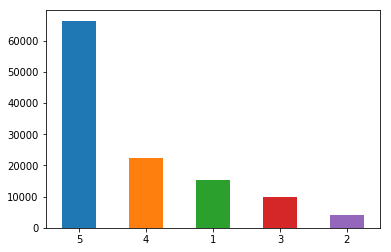

In [27]:
df.review_score.value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

In [28]:
df.review_score.value_counts()/len(df.review_score)*100

5    56.096015
4    18.891941
1    13.038922
3     8.422432
2     3.550691
Name: review_score, dtype: float64

In [29]:
df.customer_city.value_counts().head(10)

sao paulo                18728
rio de janeiro            8261
belo horizonte            3274
brasilia                  2484
curitiba                  1816
campinas                  1743
porto alegre              1667
salvador                  1537
guarulhos                 1404
sao bernardo do campo     1121
Name: customer_city, dtype: int64

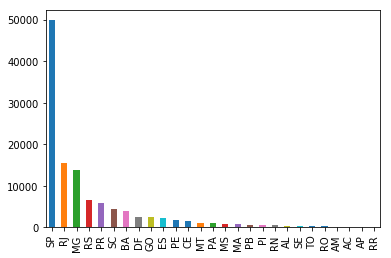

In [30]:
df.customer_state.value_counts().plot(kind="bar")
plt.xticks(rotation=90)
plt.show()

### Insights

*Most of the Product sold are from the category Home, Office, Furniture followed by the category fashion.

*Most of the product sold weighs around 500 grams.

*Most of the products in the catalog consists of a single photo.

*There are total 3095 sellers.

*Majorly the price of items lie between 0-1000.

*Majorly the freight of items lie between 0-100.

*97.8% orders are dilevered and 1% are been shipped.(Rest-canceled-0.48%,invoiced-0.31,processing-0.31)

*Majorly the payments of orders lie between 0-1000.

*Payments are done through credit_card-73.7%,boleto-19.4%,voucher-5.3%,debit_card-1.4%.

*Reviews given by customers are mostly 5 - 56%,4 - 18.8%,1 - 13%.

*Top 5 cities in terms of sales are-sao paulo,rio de janeiro,belo horizonte,brasilia,curitiba.

*Top 5 states in terms of sales are- SP,RJ,MG,RS,PR.

In [31]:
geolocations

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


# Bivariate Analysis

In [32]:
#Num vs Cat

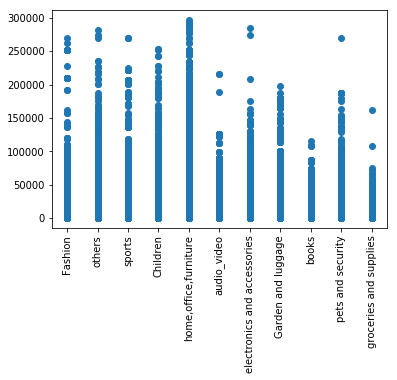

In [33]:
plt.scatter(df['products_category'],df['product_size_l*b*h_cm3'])
plt.xticks(rotation=90)
plt.show()

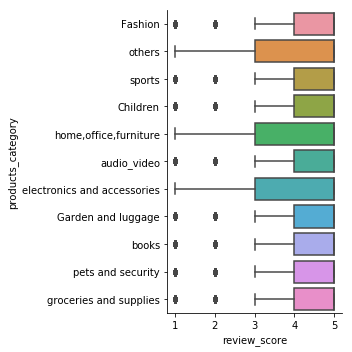

In [34]:
sns.catplot(x="review_score", y="products_category",kind="box", dodge=False, data=df)
plt.show()

In [35]:
#Almost every product category have review score mean of 4.

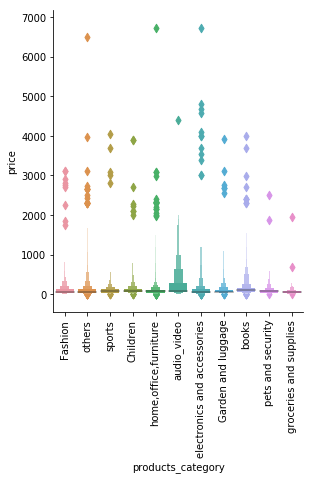

In [36]:
sns.catplot(x="products_category", y="price", kind="boxen",data=df)
plt.xticks(rotation=90)
plt.show()

In [37]:
#Price has ouliers.

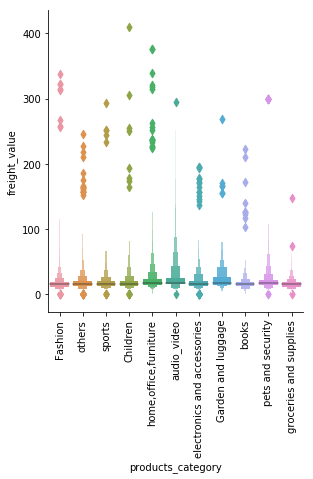

In [38]:
sns.catplot(x="products_category", y="freight_value", kind="boxen",data=df)
plt.xticks(rotation=90)
plt.show()

In [39]:
#As like price it also have outliers.

In [40]:
df.groupby("products_category").describe()["no_of_days_taken"]

,count,mean,std,min,25%,50%,75%,max
products_category,,,,,,,,
Children,7524,11 days 22:45:55.980861,9 days 10:13:40.098859,0 days 00:00:00,6 days 00:00:00,10 days 00:00:00,15 days 00:00:00,146 days 00:00:00
Fashion,16395,11 days 20:14:21.628545,9 days 05:11:20.042222,1 days 00:00:00,6 days 00:00:00,10 days 00:00:00,15 days 00:00:00,168 days 00:00:00
Garden and luggage,6000,12 days 23:14:52.800000,8 days 16:36:19.252630,1 days 00:00:00,8 days 00:00:00,11 days 00:00:00,16 days 00:00:00,166 days 00:00:00
audio_video,844,12 days 11:03:41.800947,10 days 10:38:01.539099,1 days 00:00:00,7 days 00:00:00,10 days 00:00:00,15 days 00:00:00,195 days 00:00:00
books,9824,12 days 10:25:53.745928,9 days 07:56:35.286246,1 days 00:00:00,7 days 00:00:00,10 days 00:00:00,15 days 00:00:00,194 days 00:00:00
electronics and accessories,14290,12 days 19:58:27.291812,9 days 05:30:15.521454,1 days 00:00:00,7 days 00:00:00,11 days 00:00:00,16 days 00:00:00,196 days 00:00:00
groceries and supplies,1756,10 days 21:54:31.981776,9 days 12:13:45.933624,1 days 00:00:00,5 days 00:00:00,9 days 00:00:00,13 days 00:00:00,139 days 00:00:00
"home,office,furniture",34125,12 days 15:57:35.683516,9 days 15:30:24.620487,1 days 00:00:00,7 days 00:00:00,10 days 00:00:00,16 days 00:00:00,195 days 00:00:00
others,16319,12 days 08:46:00.169128,9 days 13:08:39.043990,1 days 00:00:00,7 days 00:00:00,10 days 00:00:00,15 days 00:00:00,210 days 00:00:00


In [41]:
#The average days taken by sellers to deliver any category of product is 11 days.

In [42]:
#Num vs Num

In [43]:
df.corr()

,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_size_l*b*h_cm3,price,freight_value,payment_sequential,payment_value,review_score
product_name_length,1.000000,0.090256,-0.059088,-0.004233,-0.009786,-0.002501,-0.011313,0.006980,-0.010390,-0.017117
product_description_length,0.090256,1.000000,0.117915,0.063583,0.020882,0.201773,0.096523,0.009941,0.156120,0.009803
product_photos_qty,-0.059088,0.117915,1.000000,0.021928,0.011406,0.052647,0.023362,-0.011359,0.010911,0.023424
product_weight_g,-0.004233,0.063583,0.021928,1.000000,0.803464,0.339222,0.611599,0.043975,0.303272,-0.028868
product_size_l*b*h_cm3,-0.009786,0.020882,0.011406,0.803464,1.000000,0.298612,0.587602,0.046580,0.271471,-0.029723
price,-0.002501,0.201773,0.052647,0.339222,0.298612,1.000000,0.415940,0.006837,0.739242,-0.005463
freight_value,-0.011313,0.096523,0.023362,0.611599,0.587602,0.415940,1.000000,0.022343,0.373767,-0.037346
payment_sequential,0.006980,0.009941,-0.011359,0.043975,0.046580,0.006837,0.022343,1.000000,-0.064199,-0.003861
payment_value,-0.010390,0.156120,0.010911,0.303272,0.271471,0.739242,0.373767,-0.064199,1.000000,-0.084428
review_score,-0.017117,0.009803,0.023424,-0.028868,-0.029723,-0.005463,-0.037346,-0.003861,-0.084428,1.000000


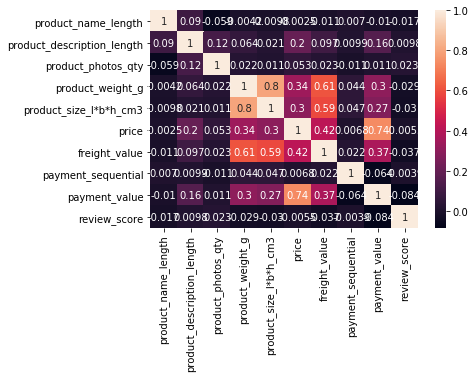

In [44]:
sns.heatmap(df.corr(),annot=True)

In [45]:
#There is a slight correlation between product weight and frieght value.
#Volume and weight have great correlation so we can drop one of them.
#price and payment are highly correlated.

In [46]:
#Cat vs Cat

In [47]:
pd.DataFrame(df.groupby("products_category")["payment_type"].value_counts())

payment_type
products_category           payment_type              
Children                    credit_card           5765
                            boleto                1297
                            voucher                372
                            debit_card              90
Fashion                     credit_card          12313
                            boleto                3002
                            voucher                839
                            debit_card             241
Garden and luggage          credit_card           4302
                            boleto                1245
                            voucher                370
                            debit_card              83
audio_video                 credit_card            592
                            boleto                 181
                            voucher                 61
                            debit_card              10
books                       credit_card           7565
                            boleto                1726
                            voucher                419
                            debit_card             114
electronics and accessories credit_card           9987
                            boleto                3438
                            voucher                602
                            debit_card             263
groceries and supplies      credit_card           1266
                            boleto                 372
                            voucher                 76
                            debit_card              42
home,office,furniture       credit_card          25185
                            boleto                6258
                            voucher               2241
                            debit_card             441
others                      credit_card          11961
                            boleto                3273
                            voucher                834
                            debit_card             251
pets and security           credit_card           1658
                            boleto                 431
                            voucher                107
                            debit_card              37
sports                      credit_card           6672
                            boleto                1795
                            voucher                411
                            debit_card             127

In [48]:
pd.DataFrame(df.groupby("products_category")["order_status"].value_counts())

order_status
products_category           order_status              
Children                    delivered             7350
                            shipped                 65
                            canceled                55
                            processing              28
                            invoiced                24
                            unavailable              2
Fashion                     delivered            16032
                            shipped                191
                            canceled                64
                            invoiced                63
                            processing              43
                            unavailable              2
Garden and luggage          delivered             5869
                            shipped                 75
                            canceled                28
                            invoiced                14
                            processing              14
audio_video                 delivered              810
                            canceled                14
                            invoiced                 8
                            processing               7
                            shipped                  5
books                       delivered             9612
                            shipped                107
                            canceled                42
                            processing              42
                            invoiced                21
electronics and accessories delivered            13961
                            shipped                134
                            canceled                80
...                                                ...
                            processing              34
                            approved                 2
                            unavailable              1
groceries and supplies      delivered             1705
                            shipped                 23
                            invoiced                13
                            processing               9
                            canceled                 6
home,office,furniture       delivered            33479
                            shipped                339
                            canceled               131
                            processing             103
                            invoiced                72
                            approved                 1
others                      delivered            15910
                            shipped                196
                            canceled                93
                            processing              69
                            invoiced                49
                            unavailable              2
pets and security           delivered             2208
                            shipped                 15
                            canceled                 5
                            processing               3
                            invoiced                 2
sports                      delivered             8792
                            shipped                105
                            canceled                52
                            invoiced                32
                            processing              24

[61 rows x 1 columns]

In [49]:
pd.DataFrame(df.groupby("products_category")["customer_state"].value_counts())

customer_state
products_category customer_state                
Children          SP                        3133
                  RJ                         984
                  MG                         899
                  RS                         443
                  PR                         386
                  BA                         237
                  SC                         237
                  DF                         171
                  ES                         163
                  GO                         153
                  PE                         112
                  CE                         100
                  MT                          83
                  PA                          75
                  MS                          67
                  MA                          52
                  RN                          47
                  PI                          42
                  PB                          33
                  RO                          26
                  TO                          20
                  AL                          19
                  SE                          19
                  AM                          12
                  AC                           6
                  AP                           3
                  RR                           2
Fashion           SP                        7032
                  MG                        1901
                  RJ                        1862
...                                          ...
pets and security TO                           4
                  AL                           3
                  AP                           2
sports            SP                        3831
                  RJ                        1094
                  MG                        1009
                  RS                         500
                  PR                         492
                  SC                         376
                  BA                         310
                  DF                         227
                  ES                         180
                  GO                         176
                  PE                         153
                  CE                          95
                  PA                          87
                  MS                          82
                  MT                          77
                  MA                          67
                  PB                          36
                  PI                          35
                  SE                          35
                  AL                          34
                  TO                          26
                  RN                          23
                  RO                          21
                  AM                          14
                  AC                           9
                  AP                           8
                  RR                           8

[292 rows x 1 columns]

In [50]:
a=pd.DataFrame(df.groupby("products_category")["customer_city"].value_counts())
a

customer_city
products_category customer_city                       
Children          sao paulo                       1204
                  rio de janeiro                   544
                  belo horizonte                   259
                  brasilia                         171
                  curitiba                         132
                  campinas                         124
                  porto alegre                     101
                  sao bernardo do campo             74
                  goiania                           73
                  salvador                          71
                  guarulhos                         63
                  osasco                            63
                  santos                            60
                  santo andre                       59
                  niteroi                           58
                  sao jose dos campos               58
                  sorocaba                          50
                  ribeirao preto                    47
                  fortaleza                         43
                  jundiai                           42
                  contagem                          40
                  sao goncalo                       37
                  mogi das cruzes                   36
                  recife                            33
                  carapicuiba                       32
                  belem                             31
                  vila velha                        30
                  juiz de fora                      29
                  uberlandia                        29
                  sao luis                          28
...                                                ...
sports            tracunhaem                         1
                  trajano de moraes                  1
                  tramandai                          1
                  travessao                          1
                  tres passos                        1
                  trindade                           1
                  tuparetama                         1
                  turmalina                          1
                  turvania                           1
                  ubaira                             1
                  ubaitaba                           1
                  ubirata                            1
                  upanema                            1
                  uruacu                             1
                  urupes                             1
                  vargem alegre                      1
                  varzea                             1
                  varzelandia                        1
                  vazante                            1
                  verissimo                          1
                  vertentes                          1
                  vila valerio                       1
                  vilhena                            1
                  virginia                           1
                  vista alegre                       1
                  vista alegre do alto               1
                  volta grande                       1
                  xapuri                             1
                  xique-xique                        1
                  ze doca                            1

[14925 rows x 1 columns]

In [51]:
import pandas_profiling as pp
pp.ProfileReport(df)

ModuleNotFoundError: No module named 'pandas_profiling'

## Doubts:
### Should we deal with outliers in the price and freight value?
### What is our target variable in the market basket analysis?

In [52]:
df.head()

,product_id,products_category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_size_l*b*h_cm3,order_id,seller_id,price,freight_value,customer_id,order_status,payment_sequential,payment_type,payment_value,review_score,customer_city,customer_state,no_of_days_taken
0,1e9e8ef04dbcff4541ed26657ea517e5,Fashion,40.0,287.0,1.0,225.0,2240.0,e17e4f88e31525f7deef66779844ddce,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,7.39,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,1,debit_card,18.30,5,mogi-guacu,SP,3 days
1,3aa071139cb16b67ca9e5dea641aaa2f,others,44.0,276.0,1.0,1000.0,10800.0,5236307716393b7114b53ee991f36956,b561927807645834b59ef0d16ba55a24,248.00,17.99,03fc97548af8f58fefc768d12b546c9c,delivered,1,voucher,265.99,5,rio de janeiro,RJ,16 days
2,96bd76ec8810374ed1b65e291975717f,sports,46.0,250.0,1.0,154.0,2430.0,01f66e58769f84129811d43eefd187fb,7b07b3c7487f0ea825fc6df75abd658b,79.80,7.82,e41819d1c95c12c9ce495b630eab8aee,delivered,1,credit_card,87.62,5,sao paulo,SP,2 days
3,cef67bcfe19066a932b7673e239eb23d,Children,27.0,261.0,1.0,371.0,2704.0,143d00a4f2dde4e0364ee1821577adb3,c510bc1718f0f2961eaa42a23330681a,112.30,9.54,322162b5ca010c2b059cb5224dd818b1,delivered,1,credit_card,121.84,1,sao paulo,SP,3 days
4,9dc1a7de274444849c219cff195d0b71,"home,office,furniture",37.0,402.0,4.0,625.0,4420.0,86cafb8794cb99a9b1b77fc8e48fbbbb,0be8ff43f22e456b4e0371b2245e4d01,37.90,8.29,c11c31965ff02cc1d7132df8edfcbc22,delivered,1,credit_card,46.19,5,sao paulo,SP,2 days


In [53]:
df.order_id.value_counts()

895ab968e7bb0d5659d16cd74cd1650c    63
fedcd9f7ccdc8cba3a18defedd1a5547    38
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
c6492b842ac190db807c15aff21a7dd6    24
68986e4324f6a21481df4e6e89abcf01    24
6d58638e32674bebee793a47ac4cbadc    24
465c2e1bee4561cb39e0db8c5993aafc    24
a3725dfe487d359b5be08cac48b64ec5    24
5a3b1c29a49756e75f1ef513383c0c12    22
285c2e15bebd4ac83635ccc563dc71f4    22
8272b63d03f5f79c56e9e4120aec44ef    21
1c11d0f4353b31ac3417fbfa5f0f2a8a    21
958c6a70e60365b576dd696ad29bbca2    21
1b15974a0141d54e36626dca3fdc731a    20
364f451ee38a4268d7c15d317021eb35    20
ab14fdcfbe524636d65ee38360e22ce8    20
ee9ca989fc93ba09a6eddc250ce01742    19
9c54a1816e487456bb7eb5082b9823ff    16
3a1ce4053005d669ac4e0047a13573cf    16
9ef13efd6949e4573a18964dd1bbe7f5    15
21577126c19bf11a0b91592e5844ba78    15
4c08f008753759d67d8ef45942f1a891    15
afc091f97bfa9985b6ab413ad1a9891b    15
428a2f660dc84138d969ccd69a0ab6d5    15
4bfcba9e084f46c8e3cb49b0f

In [54]:
df.customer_id.value_counts()

270c23a11d024a44c896d1894b261a83    63
13aa59158da63ba0e93ec6ac2c07aacb    38
9af2372a1e49340278e7c1ef8d749f34    29
92cd3ec6e2d643d4ebd0e3d6238f69e2    26
63b964e79dee32a3587651701a2b8dbf    24
d22f25a9fadfb1abbc2e29395b1239f4    24
2ba91e12e5e4c9f56b82b86d9031d329    24
6ee2f17e3b6c33d6a9557f280edd2925    24
86cc80fef09f7f39df4b0dbce48e81cb    24
be1c4e52bb71e0c54b11a26b8e8d59f2    22
b246eeed30b362c09d867b9e598bee51    22
5e0f7317756669ff7b384444dbb81fa3    21
50920f8cd0681fd86ebe93670c8fe52e    21
fc3d1daec319d62d49bfb5e1f83123e9    21
be1b70680b9f9694d8c70f41fa3dc92b    20
23924b2105c5376cd6204757c8b68752    20
bd5d39761aa56689a265d95d8d32b8be    20
eed931d3a5222a9a511d18be7fd2a5ba    19
1d48a5dcde374b9d63b2c29e6af97cb8    16
1d4411212e90d6a24fd2d09f74878b48    16
42568702f6b7a0d94ad168a4b1dbe0eb    15
1eebfdb7083031b40f727fb71f6cd5b2    15
de832e8dbb1f588a47013e53feaa67cc    15
10de381f8a8d23fff822753305f71cae    15
54ca6dc5e99a82fe5112744bc4e9ef26    15
adb32467ecc74b53576d9d13a

In [55]:
df.product_id.value_counts()

aca2eb7d00ea1a7b8ebd4e68314663af    536
99a4788cb24856965c36a24e339b6058    528
422879e10f46682990de24d770e7f83d    508
389d119b48cf3043d311335e499d9c6b    406
368c6c730842d78016ad823897a372db    398
53759a2ecddad2bb87a079a1f1519f73    391
d1c427060a0f73f6b889a5c7c61f2ac4    357
53b36df67ebb7c41585e8d54d6772e08    327
154e7e31ebfa092203795c972e5804a6    295
3dd2a17168ec895c781a9191c1e95ad7    278
2b4609f8948be18874494203496bc318    275
7c1bd920dbdf22470b68bde975dd3ccf    242
a62e25e09e05e6faf31d90c6ec1aa3d1    228
bb50f2e236e5eea0100680137654686c    210
e0d64dcfaa3b6db5c54ca298ae101d05    202
5a848e4ab52fd5445cdc07aab1c40e48    197
e53e557d5a159f5aa2c5e995dfdf244b    192
35afc973633aaeb6b877ff57b2793310    189
42a2c92a0979a949ca4ea89ec5c7b934    185
b532349fe46b38fbc7bb3914c1bdae07    181
a92930c327948861c015c919a0bcb4a8    164
f1c7f353075ce59d8a6f3cf58f419c9c    164
c4baedd846ed09b85f78a781b522f126    163
6cdd53843498f92890544667809f1595    159
19c91ef95d509ea33eda93495c4d3481    157


In [ ]:
product_id,products_category, order_id,order_item_id,customer_id,order order_purchase_timestamp